In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def fit_regression(X, y):
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    pred = model.predict(X.reshape(-1, 1))
    b0 = model.intercept_
    b1 = model.coef_[0]
    r2 = r2_score(y, pred)
    return model, pred, b0, b1, r2

def fit_polynomial_regression(X, y, degree=2):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    pred = model.predict(X_poly)
    r2 = r2_score(y, pred)
    return model, pred, poly, r2

In [3]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.3, 2.5, 2.7, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])
model, pred, b0, b1, r2 = fit_regression(X, y)
print(f"Linear Regression: b0 = {b0}, b1 = {b1}, R^2 = {r2}")

degree = 2
model_poly, pred_poly, poly, r2_poly = fit_polynomial_regression(X, y, degree)
print(f"Polynomial Regression (degree {degree}): R^2 = {r2_poly}")

Linear Regression: b0 = 1.5399999999999996, b1 = 0.4290909090909092, R^2 = 0.9812544045102185
Polynomial Regression (degree 2): R^2 = 0.9966016756714431


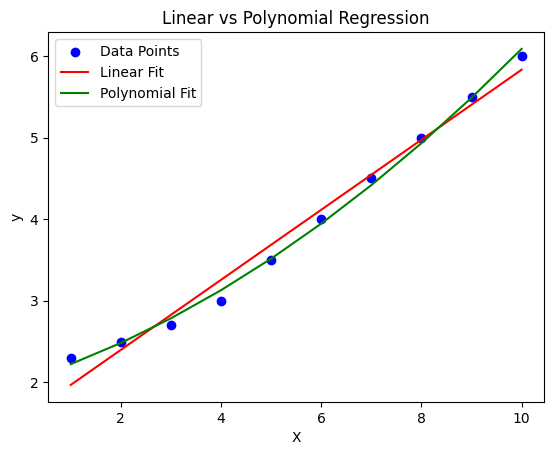

In [4]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, pred, color='red', label='Linear Fit')
plt.plot(X, pred_poly, color='green', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()

y = 1.9999999999999973 + 1.0000000000000004 * X
y = 2.0 + 1.0 * X


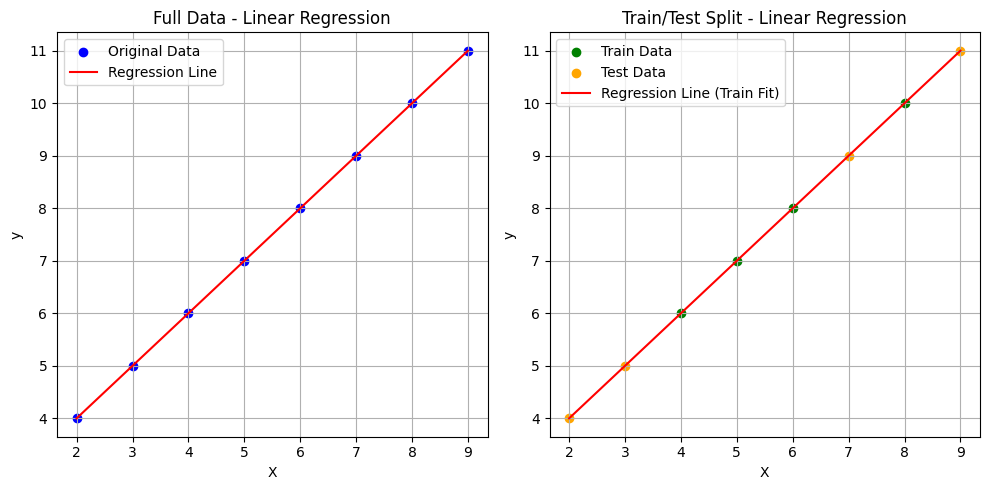

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Sample data
#X = np.random.randint(1, 11, size=10)
#y = np.random.randint(1, 11, size=10)

X = np.arange(2, 10, 1)
y = [int(X)+2 for X in X]

# Step 2: Fit Linear Regression model on full data
model_full = LinearRegression()
model_full.fit(X.reshape(-1, 1), y)
y_pred_full = model_full.predict(X.reshape(-1, 1))
slope = model_full.coef_[0]
intercept = model_full.intercept_
print(f"y = {intercept} + {slope} * X")


# Step 3: Plot original data and regression line
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred_full, color='red', label='Regression Line')
plt.title('Full Data - Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Step 5: Fit model on training data
model_split = LinearRegression()
model_split.fit(X_train.reshape(-1, 1), y_train)

# Predict using full X for consistent line plot
y_pred_split = model_split.predict(X.reshape(-1, 1))
slope = model_split.coef_[0]
intercept = model_split.intercept_
print(f"y = {intercept} + {slope} * X")

# Step 6: Plot train/test points and regression line
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='green', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X, y_pred_split, color='red', label='Regression Line (Train Fit)')
plt.title('Train/Test Split - Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
X = np.arange(2, 12, 2)
y = [int(X**2) for X in X]
print("X:", X)
print("y:", y)

X: [ 2  4  6  8 10]
y: [4, 16, 36, 64, 100]


In [ ]:
import pandas as pd

df = pd.read_csv(r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Assignments\other_source_files\Dataset_Preprocessed.csv")
print("DataFrame head:\n", df.head())

DataFrame head:
    index         Timestamp  Speed  Odometer    RPM      SOC    SOH  Torque  \
0  31606  1605186068757376    0.0    3578.0 -138.0  40.0159  96.46  -19.75   
1  31607  1605186069007728    0.0    3578.0 -146.0  40.0157  96.46  -19.25   
2  31608  1605186069257390    0.0    3578.0 -146.0  40.0156  96.46  -19.25   
3  31609  1605186069502046    0.0    3578.0 -146.0  40.0153  96.46  -19.25   
4  31610  1605186069757656    0.0    3578.0 -146.0  40.0151  96.46  -19.25   

   Motor_Temp  TP_FR  ...  Ambient_C_Temp  Pack_1_C_Temp  Pack_2_C_Temp  \
0        22.0    0.0  ...            15.5          12.59           13.7   
1        22.0    0.0  ...            15.5          12.59           13.7   
2        22.0    0.0  ...            15.5          12.59           13.7   
3        22.0    0.0  ...            15.5          12.59           13.7   
4        22.0    0.0  ...            15.5          12.59           13.7   

   Pack_4_C_Temp  Pack_Avg_C_Temp  kWh_Remaining  Horsepower  I

In [9]:
df.columns

Index(['index', 'Timestamp', 'Speed', 'Odometer', 'RPM', 'SOC', 'SOH',
       'Torque', 'Motor_Temp', 'TP_FR', 'TP_FL', 'TP_RR', 'TP_RL',
       'Aux_Pwr_100W', 'AC_Pwr_250W', 'EstPwr_AC_50W', 'HV_Bat_Voltage',
       'Brake', 'Acc_Pedal', 'ECO', 'ePedal', 'HV_Bat_Current_2',
       'Ambient_C_Temp', 'Pack_1_C_Temp', 'Pack_2_C_Temp', 'Pack_4_C_Temp',
       'Pack_Avg_C_Temp', 'kWh_Remaining', 'Horsepower', 'Instant_kW',
       'Driver_ID', 'Trip'],
      dtype='object')

In [10]:
for i in df.columns:
    print(f"Column: {i}")
    print(df[i].unique())
    print("\n")

Column: index
[  31606   31607   31608 ... 2227707 2227708 2227709]


Column: Timestamp
[1605186068757376 1605186069007728 1605186069257390 ... 1657302919501000
 1657302919750000 1657302920001000]


Column: Speed
[  0.    0.6   1.5 ... 144.8 144.9 145. ]


Column: Odometer
[ 3578.  3579.  3580. ... 15535. 15536. 15537.]


Column: RPM
[-138. -146.  -38. ... 9787. -251. -343.]


Column: SOC
[40.0159 40.0157 40.0156 ... 56.8781 56.8628 56.8625]


Column: SOH
[96.46 96.44 96.41 96.4  96.39 96.38 96.37 96.33 96.32 96.   95.98 95.97
 95.91 95.88 95.87 95.7  95.69 95.68 95.67 95.66 95.65 94.   93.96 93.94
 93.89 93.95 93.93 93.92 93.91 93.9  93.88 93.87 93.86 93.85 93.56 93.42
 93.14 93.13 93.11 93.08 93.06 93.05 93.04 93.03 93.02 93.01 93.   92.99
 92.98 92.77 92.76 92.73 92.68 92.67 92.66 92.63]


Column: Torque
[ -19.75  -19.25  -26.5  ...  187.25 -173.25 -189.25]


Column: Motor_Temp
[ 22.          23.          24.          25.          26.
  27.          25.5         22.5         28.    

In [11]:
# for numeric columns, handle outliers using IQR method

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        print(f"Handling outliers for column: {column}")
        df = handle_outliers_iqr(df, column)
print("DataFrame after handling outliers:\n", df.describe())

df = df.copy()


Handling outliers for column: index
Handling outliers for column: Timestamp
Handling outliers for column: Speed
Handling outliers for column: Odometer
Handling outliers for column: RPM
Handling outliers for column: SOC
Handling outliers for column: SOH
Handling outliers for column: Torque
Handling outliers for column: Motor_Temp
Handling outliers for column: TP_FR
Handling outliers for column: TP_FL
Handling outliers for column: TP_RR
Handling outliers for column: TP_RL
Handling outliers for column: Aux_Pwr_100W
Handling outliers for column: AC_Pwr_250W
Handling outliers for column: EstPwr_AC_50W
Handling outliers for column: HV_Bat_Voltage
Handling outliers for column: Brake
Handling outliers for column: Acc_Pedal
Handling outliers for column: ECO
Handling outliers for column: ePedal
Handling outliers for column: HV_Bat_Current_2
Handling outliers for column: Ambient_C_Temp
Handling outliers for column: Pack_1_C_Temp
Handling outliers for column: Pack_2_C_Temp
Handling outliers for co

MSE: 320.4682411418659
R² Score: 0.09938568924502467
   Actual   Predicted
0  361.25  361.913786
1  378.96  369.693132
2  384.66  374.203051
3  359.72  374.556486
4  394.79  366.655014


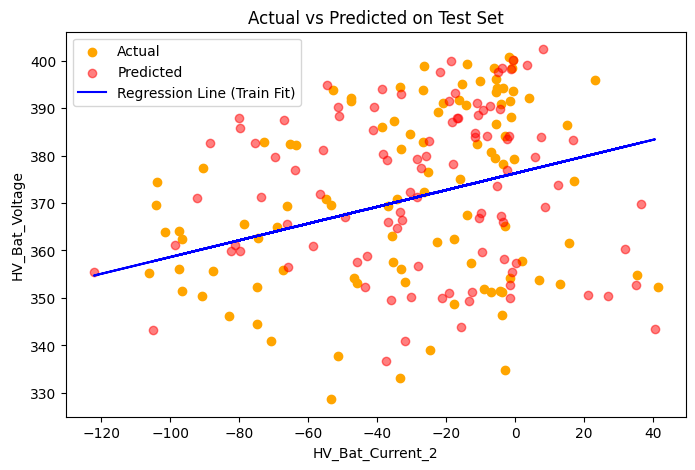

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df['HV_Bat_Current_2'].values.reshape(-1,1)  # Features
y = df['HV_Bat_Voltage'].values    # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Show actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Plotting the first feature vs actual and predicted values for test set
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:100], y_train[:100], color='orange', label='Actual')
plt.scatter(X_test[:100], y_test[:100], color='red', alpha=0.5, label='Predicted')
plt.plot(X_test[:100], y_pred[:100], color='blue', label='Regression Line (Train Fit)')
plt.xlabel('HV_Bat_Current_2')
plt.ylabel('HV_Bat_Voltage')
plt.title('Actual vs Predicted on Test Set')
plt.legend()
plt.show()

MSE: 38.069058613701564
R² Score: 0.8930142379715812
   Actual   Predicted
0  361.25  374.015403
1  378.96  377.830053
2  384.66  381.693698
3  359.72  357.866865
4  394.79  393.023024


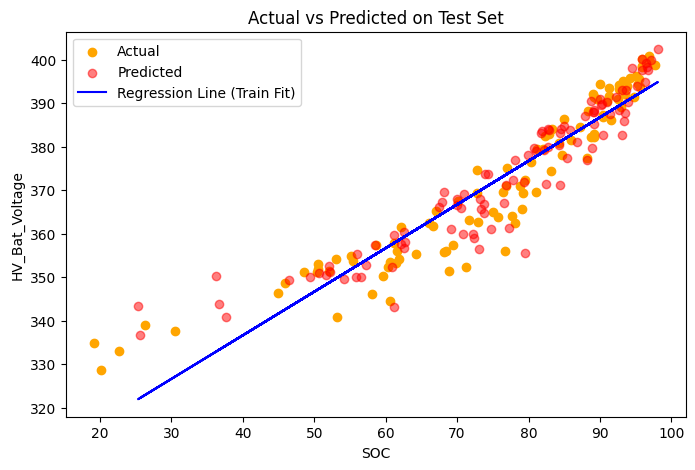

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df['SOC'].values.reshape(-1,1)  # Features
y = df['HV_Bat_Voltage'].values    # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Show actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Plotting the first feature vs actual and predicted values for test set
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:100], y_train[:100], color='orange', label='Actual')
plt.scatter(X_test[:100], y_test[:100], color='red', alpha=0.5, label='Predicted')
plt.plot(X_test[:100], y_pred[:100], color='blue', label='Regression Line (Train Fit)')
plt.ylabel('HV_Bat_Voltage')
plt.xlabel('SOC')
plt.title('Actual vs Predicted on Test Set')
plt.legend()
plt.show()

In [14]:
df['HV_Bat_Voltage'].describe()
df['SOC'].describe()

count    1.085749e+06
mean     7.433331e+01
std      1.780844e+01
min      1.753890e+01
25%      6.126340e+01
50%      7.728800e+01
75%      9.005930e+01
max      9.903110e+01
Name: SOC, dtype: float64

In [15]:
X = df['HV_Bat_Voltage'].values.reshape(-1,1)  # Features
y = df['SOC'].values    # Target
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X:", X)
print("y:", y)

X shape: (1085749, 1)
y shape: (1085749,)
X: [[349.12]
 [349.  ]
 [348.91]
 ...
 [357.01]
 [356.85]
 [356.98]]
y: [39.808  39.8071 39.8064 ... 57.5275 57.5236 57.5232]


MSE: 0.1759250264302773
R² Score: 0.9963911236550019
      Actual  Predicted
0  30.049536  30.256886
1  31.349355  31.747996
2  33.029027  33.258258
3  24.223676  23.944576
4  38.464857  37.686784


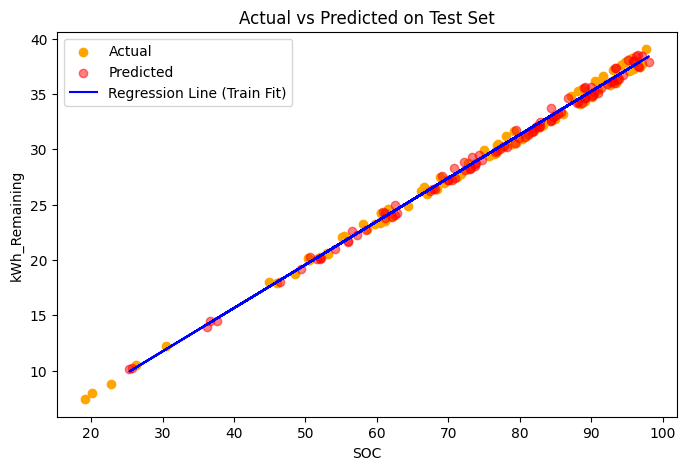

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df['SOC'].values.reshape(-1,1)  # Features
y = df['kWh_Remaining'].values    # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Show actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Plotting the first feature vs actual and predicted values for test set
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:100], y_train[:100], color='orange', label='Actual')
plt.scatter(X_test[:100], y_test[:100], color='red', alpha=0.5, label='Predicted')
plt.plot(X_test[:100], y_pred[:100], color='blue', label='Regression Line (Train Fit)')
plt.xlabel('SOC')
plt.ylabel('kWh_Remaining')
plt.title('Actual vs Predicted on Test Set')
plt.legend()
plt.show()

MSE: 5.423934774334586
R² Score: 0.8887349327091534
      Actual  Predicted
0  30.049536  25.677796
1  31.349355  31.858357
2  33.029027  33.847583
3  24.223676  25.143846
4  38.464857  37.382822


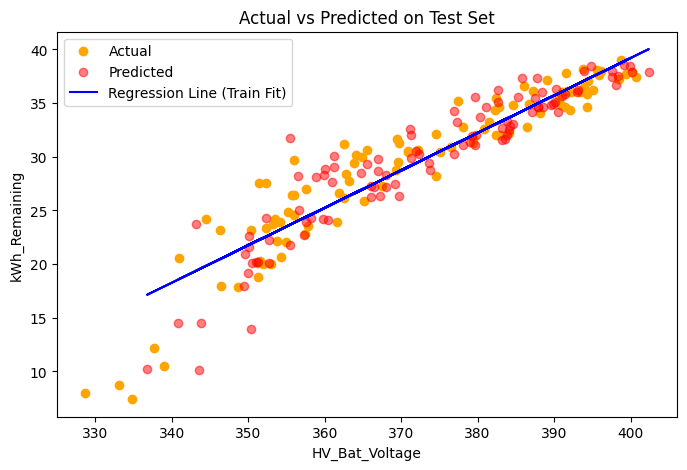

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df['HV_Bat_Voltage'].values.reshape(-1,1)  # Features
y = df['kWh_Remaining'].values    # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Show actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Plotting the first feature vs actual and predicted values for test set
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:100], y_train[:100], color='orange', label='Actual')
plt.scatter(X_test[:100], y_test[:100], color='red', alpha=0.5, label='Predicted')
plt.plot(X_test[:100], y_pred[:100], color='blue', label='Regression Line (Train Fit)')
plt.xlabel('HV_Bat_Voltage')
plt.ylabel('kWh_Remaining')
plt.title('Actual vs Predicted on Test Set')
plt.legend()
plt.show()

MSE: 232.50479961407055
R² Score: 0.07450188901725374
   Actual  Predicted
0    61.0  40.307425
1    36.0  49.837932
2    35.0  46.148704
3    40.0  52.297418
4    32.0  46.763575


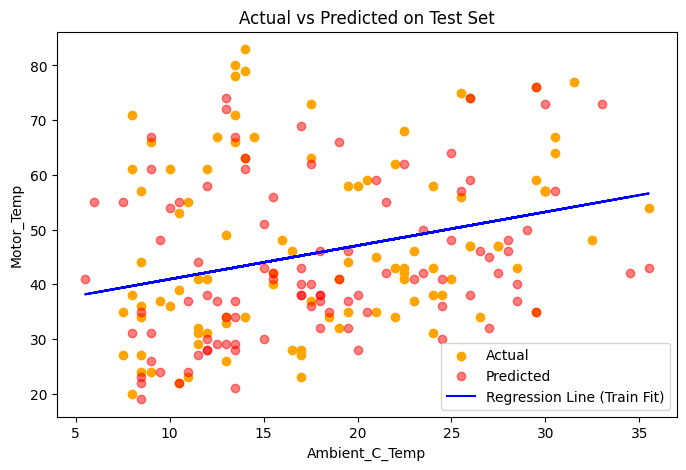

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df['Ambient_C_Temp'].values.reshape(-1,1)  # Features
y = df['Motor_Temp'].values    # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Show actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# Plotting the first feature vs actual and predicted values for test set
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:100], y_train[:100], color='orange', label='Actual')
plt.scatter(X_test[:100], y_test[:100], color='red', alpha=0.5, label='Predicted')
plt.plot(X_test[:100], y_pred[:100], color='blue', label='Regression Line (Train Fit)')
plt.xlabel('Ambient_C_Temp')
plt.ylabel('Motor_Temp')
plt.title('Actual vs Predicted on Test Set')
plt.legend()
plt.show()